# astropy Tutorial for IUCAA workshop, Nagpur

Adapted from tutorial by Axel Donath

## What is Astropy?

  ### A single core package for Astronomy in Python

#### Astropy package is structured into several submodules** and we will cover some of the important pnes:

1. [astropy.units] to do astronomical calculations with units.

2. [astropy.coordinates] to handle astronomical sky positions, coordinate systems and coordinate transformations.

3. [astropy.tables] to handle astronomical data tables.

4. [astropy.io.fits] to open and write data files in [FITS format].


## Other Resources

There are other ressources with Astropy tutorials, we can recommend:

- [Learn.Astropy](http://learn.astropy.org) webpage with a lot of tutorial material.
- [Astropy documentation](http://docs.astropy.org) webpage, with lots of small usage examples.
- [Astropy Tutorials](https://github.com/astropy/astropy-tutorials) repository (same as linked on Learn.Astropy)
- [Astropy workshop](https://github.com/astropy/astropy-workshop) held the AAS meeting 2019. 
- [STAK project](https://stak-notebooks.readthedocs.io/en/latest/) provided by STSci, with tutorial notebooks for typical IRAF analysis tasks. 
- [Webinar on Youtube](https://www.youtube.com/watch?v=YP42k3J08_o&list=PL7kL5D8ITGyV7zeT-oADweFKHsZNh3tKV) provided by Astronomy Data and Computing Services (ADACS). 

## 0. Setup

Check package versions. All examples should work with Astropy > 2.0 and Numpy > 1.11

In [174]:
%matplotlib inline  
import matplotlib.pyplot as plt

In [175]:
import numpy as np
import astropy
print('numpy:', np.__version__)
print('astropy:', astropy.__version__)

numpy: 1.23.5
astropy: 5.1


## 1. Units and Quantities

The [astropy.units]() subpackage provides functions and classes to handle physical quantities with units. 

import the `astropy.units` : 

In [110]:
from astropy import units as u

In [179]:
dist1=1*u.lightsecond
dist1

<Quantity 1. lyr>

`Quantities` are created by multiplying any number with a unit object:

In [177]:
distance=1.* u.AU
distance

<Quantity 1. AU>

Check the availabe units with tab completion on the units module, `u.<TAB>`.

In [112]:
distance = 1. * u.lightyear
print(distance)

1.0 lyr


In [113]:
u.parsec

Unit("pc")

In [182]:
distance=1*u.parsec

In [183]:
distance.to('meter')

<Quantity 3.08567758e+16 m>

In [184]:
distance.to(u.meter)

<Quantity 3.08567758e+16 m>

In [189]:
distance.to(u.lightyear)

<Quantity 3.26156378 lyr>

In [117]:
distance.to(u.parsec)

<Quantity 0.30660139 pc>

In [118]:
distance1=1.* u.parsec

In [119]:
distance1.to(u.lightyear)

<Quantity 3.26156378 lyr>

In [120]:
distance1.to('lightyear')

<Quantity 3.26156378 lyr>

Or by passing a string to the general `Quantity` object:

In [191]:
distance = 1*u.lightyear
distance

<Quantity 1. lyr>

Quantities can be combined with any arithmetical expression to derive other quantities, `astropy.units` will propagate
the units correctly:

In [192]:
speed_of_light = distance / u.year
print(speed_of_light.to('km/s'))

299792.458 km / s


In [193]:
print(speed_of_light.to('angstrom/day'))

2.5902068371199996e+23 Angstrom / d


Quantities can be also created using lists and arrays:

In [194]:
distances = [1, 6, 10] * u.lightyear
print(distances)

[ 1.  6. 10.] lyr


In [195]:
distances2 = np.array([1, 6, 10]) * u.lightyear
print(distances2)

[ 1.  6. 10.] lyr


In [196]:
distances.value

array([ 1.,  6., 10.])

The quantity object has a value attribute, which is a plain `numpy.ndarray`:

In [197]:
type(distances.value)

numpy.ndarray

And a unit, which is represented by a `astropy.units.core.Unit` object:

In [128]:
distances.unit

Unit("lyr")

In [129]:
type(distances.unit)

astropy.units.core.Unit

A quantity behaves in many ways just like a `numpy.ndarray` with an attached unit.

In [130]:
distances * 10

<Quantity [ 10.,  60., 100.] lyr>

Many numpy functions will work as expected and return again a `Quantity` object:

In [131]:
np.max(distances)

<Quantity 10. lyr>

In [132]:
np.mean(distances)

<Quantity 5.66666667 lyr>

Caution: There are cases where the unit handling is not well defined, e.g. in `np.log` arguments have to be dimensionless.

In [199]:
#np.log(30 * u.MeV) # Will raise an UnitConversionError
np.log(30 * u.MeV / (10 * u.MeV))

<Quantity 1.09861229>

The most practical way to work with units is: define the input quantities with units, do the computation and finally convert the final result to the desired units. 
In most cases there is no need for intermediate unit conversions.

For standardized unit systems such as `'si'` or `'cgs'` there are convenience attributes on the quantity object:

In [200]:
speed_of_light.si

<Quantity 2.99792458e+08 m / s>

In [201]:
speed_of_light.cgs

<Quantity 2.99792458e+10 cm / s>

### 1.2. Equivalencies

In Astronomy and other fields of physics quantities are often measured in more practical units, which are equivalent to the actual physical unit. In `astropy.units` this is handled with the concept of "equivalencies".  

For example consider units to measure spectral quantities such as wavelength, frequency and energy:

In [202]:
frequency = 3e20 * u.hertz
frequency.to('MeV', equivalencies=u.spectral())

<Quantity 1.24070031 MeV>

In [203]:
frequency.to('picometer', equivalencies=u.spectral())

<Quantity 0.99930819 pm>

Or for converting temperatures:

In [204]:
temperature = 25 * u.Celsius

In [205]:
temperature.to("Kelvin", equivalencies=u.temperature())

<Quantity 298.15 K>

In [206]:
with u.imperial.enable():
    print(temperature.to("deg_F", equivalencies=u.temperature()))

77.0 deg_F


### 1.3 Constants

Astropy provides a lot of builtin physical and astronomical constants quantitites in the [astropy.constants]() submodule:

In [207]:
from astropy import constants as const

print(const.c.to('km / s'))

299792.458 km / s


In [208]:
const.c

<<class 'astropy.constants.codata2018.CODATA2018'> name='Speed of light in vacuum' value=299792458.0 uncertainty=0.0 unit='m / s' reference='CODATA 2018'>

In [210]:
const.R_sun

<<class 'astropy.constants.iau2015.IAU2015'> name='Nominal solar radius' value=695700000.0 uncertainty=0.0 unit='m' reference='IAU 2015 Resolution B 3'>

Here is a [list of available constants](http://docs.astropy.org/en/stable/constants/#module-astropy.constants).

If you write a function you can make sure the input is given in the right units using the [astropy.units.quantity_input](http://docs.astropy.org/en/stable/api/astropy.units.quantity_input.html#astropy.units.quantity_input) decorator: 

## 2. Coordinates

With the submodule [astropy.coordinates](http://docs.astropy.org/en/stable/coordinates/) Astropy provides a framework to handle sky positions in various coordinate systems and transformations between them.


### 2.1 Basics
The basic class to handle sky coordinates is [SkyCoord](http://docs.astropy.org/en/stable/api/astropy.coordinates.SkyCoord.html):

In [211]:
from astropy.coordinates import SkyCoord

It can be created by passing a position angle for longitude and latitude and a keyword specifying a coordinate frame:

In [212]:
position_crab = SkyCoord(83.63 * u.deg,  22.01 * u.deg, frame='icrs')
print(position_crab)

<SkyCoord (ICRS): (ra, dec) in deg
    (83.63, 22.01)>


As for `Quantities` the instanciation with `lists`, `arrays` or even `Quantities` also works:

In [213]:
positions = SkyCoord([345., 234.3] * u.deg,  [-0.1, 0.2] * u.deg, frame='galactic')
print(positions)

<SkyCoord (Galactic): (l, b) in deg
    [(345. , -0.1), (234.3,  0.2)]>


Alternatively the angles can be specified as string:

In [215]:
position_crab = SkyCoord('5h34m31.97s', '22d0m52.10s', frame='icrs')

# or

position_crab = SkyCoord('5:34:31.97', '22:0:52.10',
                         unit=(u.hour, u.deg), frame='icrs')
position_crab

<SkyCoord (ICRS): (ra, dec) in deg
    (83.63320833, 22.01447222)>

Where in the first case the unit doesn't have to specified because it is encoded in the string via `'hms'` and `'dms'`.

A very convenient way to get the coordinates of an individual object is qerying the [Sesame](http://cds.u-strasbg.fr/cgi-bin/Sesame) database with `SkyCoord.from_name()`:

In [147]:
#SkyCoord.from_name('Crab')

To transform the coordinates to a different coordinate system we can use `SkyCoord.transform_to()`:

In [218]:
pos_gal = position_crab.transform_to('galactic')
pos_gal

<SkyCoord (Galactic): (l, b) in deg
    (184.55754381, -5.78427369)>

For convenience we can also directly use the `.galactic` or `.icrs` attributes:

In [219]:
position_crab.galactic

<SkyCoord (Galactic): (l, b) in deg
    (184.55754381, -5.78427369)>

In [220]:
position_crab.icrs

<SkyCoord (ICRS): (ra, dec) in deg
    (83.63320833, 22.01447222)>

To access the `longitude` and `latitude` angles individually: 

In [221]:
position_crab.data.lon

<Longitude 5.57554722 hourangle>

In [222]:
position_crab.data.lat

<Latitude 22.01447222 deg>

### 2.2 Measuring distances between positions in the sky
The angular distance between two [SkyCoord](http://docs.astropy.org/en/stable/api/astropy.coordinates.SkyCoord.html) objects, can be found using the [SkyCoord.separation()](http://docs.astropy.org/en/stable/api/astropy.coordinates.SkyCoord.html#astropy.coordinates.SkyCoord.separation) method:

In [153]:
#position_saga = SkyCoord.from_name('Sag A*')
position_saga = SkyCoord(0 * u.deg, 0 * u.deg, frame='galactic')

position_crab.separation(position_saga)

<Angle 172.64076197 deg>

In [154]:
position_crab

<SkyCoord (ICRS): (ra, dec) in deg
    (83.63320833, 22.01447222)>

Sometimes the "inverse" operation is also useful: compute a new position based on a given offset and position angle:

### 2.3 ALT - AZ coordinates (optional)

In various cirumstances, e.g. for planning observations, it can be usefull to transform a sky coordinate into a position in the horizontal coordinate system given a location on earth and a time

In [223]:
from astropy.coordinates import EarthLocation, AltAz
from astropy.time import Time

We define a location using [EarthLocation](http://docs.astropy.org/en/stable/api/astropy.coordinates.EarthLocation.html):

In [224]:
nagpur = EarthLocation(lat=21.1458 * u.deg, lon=79.0882 * u.deg)
print(nagpur.geodetic)

GeodeticLocation(lon=<Longitude 79.0882 deg>, lat=<Latitude 21.1458 deg>, height=<Quantity -1.0334341e-09 m>)


And a time using the [Time](http://docs.astropy.org/en/stable/api/astropy.time.Time.html) object:

In [225]:
now = Time.now()
print(now)

2023-04-08 06:24:19.535897


Now we can define a horizontal coordinate system using the [AltAz]([docs.astropy.org/en/stable/api/astropy.coordinates.AltAz.html) class and use it to convert from the sky coordinate:

In [227]:
altaz = AltAz(obstime=now, location=nagpur)
crab_altaz = position_crab.transform_to(altaz)
print(crab_altaz)

<SkyCoord (AltAz: obstime=2023-04-08 06:24:19.535897, location=(1126559.85347347, 5843660.69673896, 2286458.13338282) m, pressure=0.0 hPa, temperature=0.0 deg_C, relative_humidity=0.0, obswl=1.0 micron): (az, alt) in deg
    (74.24089888, 23.24046125)>


## 3. Tables

Astropy provides the [Table](http://docs.astropy.org/en/stable/api/astropy.io.votable.tree.Table.html) class in order to handle data tables.

### 3.1 Basics

Table objects can be created as shown in the following

In [159]:
from astropy.table import Table

In [230]:
table = Table()
print(table)

<No columns>


We add columns to the table like we would add entries to a dictionary

In [231]:
table['Source_Name'] = ['Crab', 'Sag A*', 'Cas A', 'Vela Junior']
table['GLON'] = [184.5575438, 0, 111.74169477, 266.25914205] * u.deg
table['GLAT'] = [-5.78427369, 0, -2.13544151, -1.21985818] * u.deg
table['Source_Class'] = ['pwn', 'unc', 'snr', 'snr']

By executing the following cell, we get a nicely formatted version of the table printed in the notebook:

In [232]:
table

Source_Name,GLON,GLAT,Source_Class
,deg,deg,
str11,float64,float64,str3
Crab,184.5575438,-5.78427369,pwn
Sag A*,0.0,0.0,unc
Cas A,111.74169477,-2.13544151,snr
Vela Junior,266.25914205,-1.21985818,snr


### 3.2 Accessing rows and columns

We have access to the defined columns. To check which ones are availbe you can use `Table.colnames`:

In [244]:
table.colnames

['Source_Name', 'GLON', 'GLAT', 'Source_Class']

And access individual columns just by their name:

In [245]:
table['GLON']

184.5575438
0.0
111.74169477
266.25914205


And also a subset of columns:

In [246]:
table[['Source_Name', 'GLON']]

Source_Name,GLON
,deg
str11,float64
Crab,184.5575438
Sag A*,0.0
Cas A,111.74169477
Vela Junior,266.25914205


Often, it is handy to get the column data as [astropy.units.Quantity](http://docs.astropy.org/en/stable/api/astropy.units.Quantity.html#astropy.units.Quantity) using the `.quantity` property:

In [247]:
table['GLON'].quantity

<Quantity [184.5575438 ,   0.        , 111.74169477, 266.25914205] deg>

Rows can be accessed using numpy indexing:

In [248]:
table[0:2]

Source_Name,GLON,GLAT,Source_Class
,deg,deg,
str11,float64,float64,str3
Crab,184.5575438,-5.78427369,pwn
Sag A*,0.0,0.0,unc


Or by using a boolean numpy array for indexing:

In [249]:
selection = table['Source_Name'] == 'Crab'
table[selection]

Source_Name,GLON,GLAT,Source_Class
,deg,deg,
str11,float64,float64,str3
Crab,184.5575438,-5.78427369,pwn


There is also a more sophisticated indexing scheme, which is explained [here](http://docs.astropy.org/en/stable/table/indexing.html), but not covered in this tutorial.

### 3.3 Reading / Writing tables to disk
Astropy tables can be serialized into many formats. For an overview see [here](http://docs.astropy.org/en/latest/io/unified.html#built-in-table-readers-writers). To write the table in FITS format we can use:

In [250]:
table.write('data/example.fits', overwrite=True, format='fits')

In [251]:
table.write('data/example.ecsv', overwrite=True, format='ascii.ecsv')

In [252]:
Table.read('data/example.fits')

Source_Name,GLON,GLAT,Source_Class
,deg,deg,
bytes11,float64,float64,bytes3
Crab,184.5575438,-5.78427369,pwn
Sag A*,0.0,0.0,unc
Cas A,111.74169477,-2.13544151,snr
Vela Junior,266.25914205,-1.21985818,snr


In [253]:
table.loc["CasA"]

ValueError: Cannot create TableLoc object with no indices

This works for mutiple keys as well:

In [254]:
table.loc[["Cas A", "Crab"]]

ValueError: Cannot create TableLoc object with no indices

Astropy's table object also supports the possiblity to group the rows by a given key column. The groups will be defined by the unique values contained in the column defined as key:

In [255]:
table_grouped = table.group_by("Source_Class")

for group in table_grouped.groups:
    print(group, "\n")

Source_Name     GLON        GLAT    Source_Class
                deg         deg                 
----------- ----------- ----------- ------------
       Crab 184.5575438 -5.78427369          pwn 

Source_Name     GLON         GLAT    Source_Class
                deg          deg                 
----------- ------------ ----------- ------------
      Cas A 111.74169477 -2.13544151          snr
Vela Junior 266.25914205 -1.21985818          snr 

Source_Name GLON GLAT Source_Class
            deg  deg              
----------- ---- ---- ------------
     Sag A*  0.0  0.0          unc 



Where each `group` is again a `Table` object:

In [ ]:
type(group)

### 3.5. Miscellaneous

These are a few other useful operations when working with Astropy tables.

Sort by key:

In [ ]:
table.sort('GLON')

In [ ]:
table

Note that `.sort()` is an in place operation on the table, i.e. changes the actual table.

To remove a specific row by index:

In [ ]:
table.remove_row(0)

Astropy tables also support row-wise iteration in Python loops:

In [ ]:
for row in table:
    print(row['Source_Name'])

Another useful feature for quickly inspecting the data contained in the table is the `.show_in_browser()` method:

In [ ]:
table.show_in_browser(jsviewer=True)

## 4. FITS Images and WCS

The [flexible image transport system](https://fits.gsfc.nasa.gov/fits_documentation.html) format (FITS) is widely used data format for astronomical images and tables. As example we will use image data of the supernova remnant [Cassiopeia A](https://en.wikipedia.org/wiki/Cassiopeia_A), taken by the [Chandra X-ray observatory](http://chandra.harvard.edu/).

### 4.1 Basics


In [257]:
from astropy.io import fits

To open the fits file we use `fits.open()` and just specify the filename as an argument:

In [258]:
hdulist = fits.open('data/casa_0.5-1.5keV.fits.gz')

We can retrieve some basic information on the  header data unit (HDU) by calling `.info()`:

In [259]:
hdulist.info()

Filename: data/casa_0.5-1.5keV.fits.gz
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      26   (1024, 1024)   float32   


It contains only one `PrimaryHDU` with data dimensions `(1024, 1024)` of format `float32`. To access the hdu we use:

In [260]:
image_hdu = hdulist['PRIMARY'] 

#or

image_hdu = hdulist[0] 

We can access the data with the `.data` attribute:

In [262]:
image_hdu.data

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 1., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)

It is a plain 2d numpy array. We use `plt.imshow()` to visualize it:

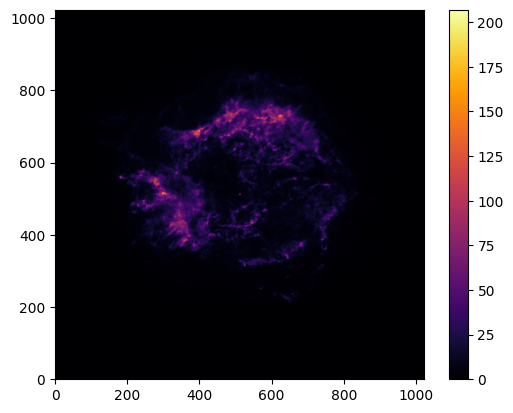

In [263]:
plt.imshow(image_hdu.data, origin='lower', cmap='inferno')
plt.colorbar()

Additional meta information is stored in the `.header` attribute:

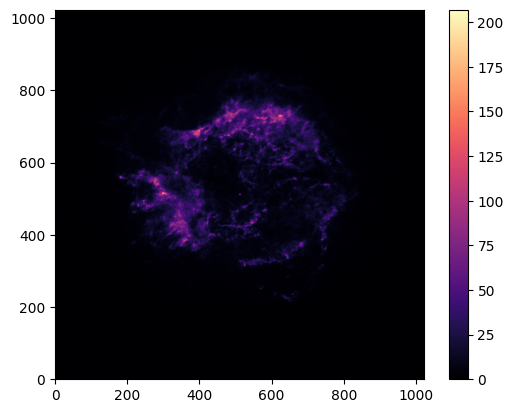

In [265]:
plt.imshow(image_hdu.data, origin='lower', cmap='magma') # plasma, magma, cividis
plt.colorbar()

In [266]:
image_hdu.header

SIMPLE  =                    T / Fits standard                                  
BITPIX  =                  -32 / Bits per pixel                                 
NAXIS   =                    2 / Number of axes                                 
NAXIS1  =                 1024 / Axis Length                                    
NAXIS2  =                 1024 / Axis Length                                    
OBJECT  = 'Cassiopeia A'                                                        
DATE-OBS= '2007-12-05T22:01:59'                                                 
DATE-END= '2007-12-08T20:07:24'                                                 
LTM1_1  =                    1                                                  
LTM1_2  =                    0                                                  
LTM2_1  =                    0                                                  
LTM2_2  =                    1                                                  
LTV1    =                -36

We now use the header information to create a world coordinate to pixel coordinate transformation, using the [astropy.wcs.WCS](http://docs.astropy.org/en/stable/api/astropy.wcs.WCS.html#astropy.wcs.WCS) class:

In [269]:
from astropy.wcs import WCS

In [271]:
wcs = WCS(image_hdu.header)
print(wcs)

WCS Keywords

Number of WCS axes: 2
CTYPE : 'RA---TAN'  'DEC--TAN'  
CRVAL : 350.8841248  58.78133011  
CRPIX : 445.5  289.5  
PC1_1 PC1_2  : 1.0  0.0  
PC2_1 PC2_2  : 0.0  1.0  
CDELT : -0.0001366666693  0.0001366666693  
NAXIS : 1024  1024


Using the helper methods [SkyCoord.to_pixel()](http://docs.astropy.org/en/stable/api/astropy.coordinates.SkyCoord.html#astropy.coordinates.SkyCoord.to_pixel) and [SkyCood.from_pixel()](http://docs.astropy.org/en/stable/api/astropy.coordinates.SkyCoord.html#astropy.coordinates.SkyCoord.from_pixel) we can now convert every position in the image to the corresponding sky coordinate:

In [272]:
SkyCoord.from_pixel(0, 0, wcs)

<SkyCoord (ICRS): (ra, dec) in deg
    (351.00119731, 58.74184873)>

In [ ]:
# position_casa = SkyCoord.from_name('Cas A')

# or

position_casa = SkyCoord('23h23m27.94s', '+58d48m42.4s', frame='icrs')

position_casa.to_pixel(wcs)

## 5. Plotting of sky images (optional)

The [Matplotlib](https://matplotlib.org/) package is a very popular plotting package for Python. Astropy provides a helper module [astropy.visualization.wcsaxes](http://docs.astropy.org/en/stable/visualization/wcsaxes/) to simplify plotting of sky images with Matplotlib.

To use it we just pass `projection=wcs` to the `plt.subplot()` function:

In [ ]:
ax = plt.subplot(projection=wcs)
ax.imshow(image_hdu.data, cmap='inferno', origin='lower')

ax.set_xlabel('RA (deg)')
ax.set_ylabel('DEC (deg)')

And we get the plot with the x-axis and y-axis in sky coordinates. 

We can add a coordinate grid with `ax.grid()`:

In [ ]:
ax.grid(linewidth=0.3, linestyle='dashed', color='white')
ax.figure

We add a white cross to mark the center position of `'Cas A'`:

In [ ]:
ra = position_casa.icrs.ra.deg
dec = position_casa.icrs.dec.deg
ax.scatter(ra, dec, transform=ax.get_transform('icrs'), color='white', marker='x')
ax.figure

We can also add geometrical shapes to the image to illustrate regions:

In [ ]:
from matplotlib.patches import Circle
from astropy.wcs.utils import proj_plane_pixel_scales

In [ ]:
# transform to pixel coordinates
xy = ax.wcs.world_to_pixel(position_casa)
pixel_size = proj_plane_pixel_scales(wcs)[0] * u.deg
radius = 2.2 * u.arcmin / pixel_size

In [ ]:
circle = Circle(
    xy=xy,
    radius=radius.to_value(""),
    edgecolor="w",
    facecolor="None"
)
ax.add_patch(circle)
ax.figure

In [273]:
from astropy.io import fits
from astropy.wcs import WCS
from astropy.utils.data import get_pkg_data_filename
fn = get_pkg_data_filename('data/j94f05bgq_flt.fits', package='astropy.wcs.tests')
f = fits.open(fn)
w = WCS(f[1].header)
sky = w.pixel_to_world(30, 40)
print(sky)  
f.close()

<SkyCoord (ICRS): (ra, dec) in deg
    (5.52844243, -72.05207809)>
